In [42]:
import pandas as pd

In [64]:
census_df = pd.read_csv("C:\hoby_data\india-census\india-districts-census-2011.csv")

In [65]:
census_df.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


In [66]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [67]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Columns: 118 entries, District code to Total_Power_Parity
dtypes: int64(116), object(2)
memory usage: 590.1+ KB


In [85]:
use_c = census_df[['Female', 'Female_Literate', 'Power_Parity_Rs_150000_330000']]

In [86]:
use_c.head()

,Female,Female_Literate,Power_Parity_Rs_150000_330000
0,396164,156831,172
1,355704,127908,161
2,54516,30936,37
3,63017,29935,30
4,224936,98391,85


In [87]:
use_c['female_perc'] = use_c['Female_Literate']/use_c['Female']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
use_c.head()

,Female,Female_Literate,Power_Parity_Rs_150000_330000,female_perc
0,396164,156831,172,0.395874
1,355704,127908,161,0.359591
2,54516,30936,37,0.567466
3,63017,29935,30,0.475031
4,224936,98391,85,0.437418


In [89]:
use_c['female_perc'] = use_c['female_perc'].apply(lambda p: round(p,2)*100)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
use_c.head()

,Female,Female_Literate,Power_Parity_Rs_150000_330000,female_perc
0,396164,156831,172,40.0
1,355704,127908,161,36.0
2,54516,30936,37,57.0
3,63017,29935,30,48.0
4,224936,98391,85,44.0


In [98]:
use_c['fem_lit'] = pd.cut(use_c['female_perc'], bins=np.arange(0.0,101.0,10), labels=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
use_c['fem_lit'].max()

8

In [100]:
import numpy as np
labels = np.array('0-10 10-20 20-30 30-40 40-50 50-60 60-70 70-80 80-90 90-100'.split())
use_c['fem_lit_range'] = labels[use_c['fem_lit']]
del use_c['fem_lit']
use_c.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Female,Female_Literate,Power_Parity_Rs_150000_330000,female_perc,fem_lit_range
0,396164,156831,172,40.0,30-40
1,355704,127908,161,36.0,30-40
2,54516,30936,37,57.0,50-60
3,63017,29935,30,48.0,40-50
4,224936,98391,85,44.0,40-50


In [101]:
tab = use_c.groupby(['fem_lit_range'])['Power_Parity_Rs_150000_330000'].mean().reset_index()

In [105]:
tab = tab[0:6]

([<matplotlib.axis.XTick at 0x2d17615e828>,
 <a list of 6 Text xticklabel objects>)

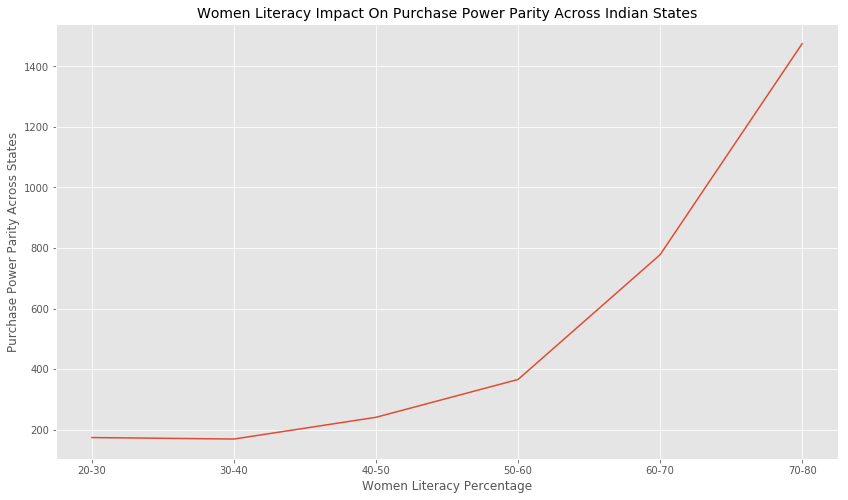

In [114]:
plt.figure(figsize=(14,8))
plt.plot(tab['Power_Parity_Rs_150000_330000'])
plt.title("Women Literacy Impact On Purchase Power Parity Across Indian States",fontdict={'fontsize':14})
plt.xlabel("Women Literacy Percentage Across Satus")
plt.ylabel("Purchase Power Parity Across States")
plt.xticks(ticks=[0,1,2,3,4,5],labels=tab['fem_lit_range'].unique())